In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from collections import Counter
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
import tensorflow as tf
import random

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the dataset
data = pd.read_csv('dermatology_database_1.csv')

data1= pd.read_csv('dermatology_database_1.csv')
# Display basic information about the dataset
print("Dataset columns:", data.columns)
data.info()
print(data.head())

Dataset columns: Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate', 'age', 'class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total

In [5]:
print("\nMissing Values Count Per Column:")
print(data.isnull().sum())  # Counts missing values in each column


Missing Values Count Per Column:
erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess      

In [6]:
missing_rows = data[data.isnull().any(axis=1)]
print("\nRows with Missing Values:")
print(missing_rows)


Rows with Missing Values:
Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_infiltrate, PNL_infiltrate, fibrosis_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_rete_ridges, elongation_rete_ridges, thinning_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_granular_layer, vacuolisation_damage_basal_layer, spongiosis, saw_tooth_appearance_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_mononuclear_infiltrate, band_like_infiltrate, age, class]
Index: []

[0 rows x 35 columns]


In [7]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("\nPercentage of Missing Values Per Column:")
print(missing_percentage)


Percentage of Missing Values Per Column:
erythema                               0.0
scaling                                0.0
definite_borders                       0.0
itching                                0.0
koebner_phenomenon                     0.0
polygonal_papules                      0.0
follicular_papules                     0.0
oral_mucosal_involvement               0.0
knee_and_elbow_involvement             0.0
scalp_involvement                      0.0
family_history                         0.0
melanin_incontinence                   0.0
eosinophils_infiltrate                 0.0
PNL_infiltrate                         0.0
fibrosis_papillary_dermis              0.0
exocytosis                             0.0
acanthosis                             0.0
hyperkeratosis                         0.0
parakeratosis                          0.0
clubbing_rete_ridges                   0.0
elongation_rete_ridges                 0.0
thinning_suprapapillary_epidermis      0.0
spongiform_p

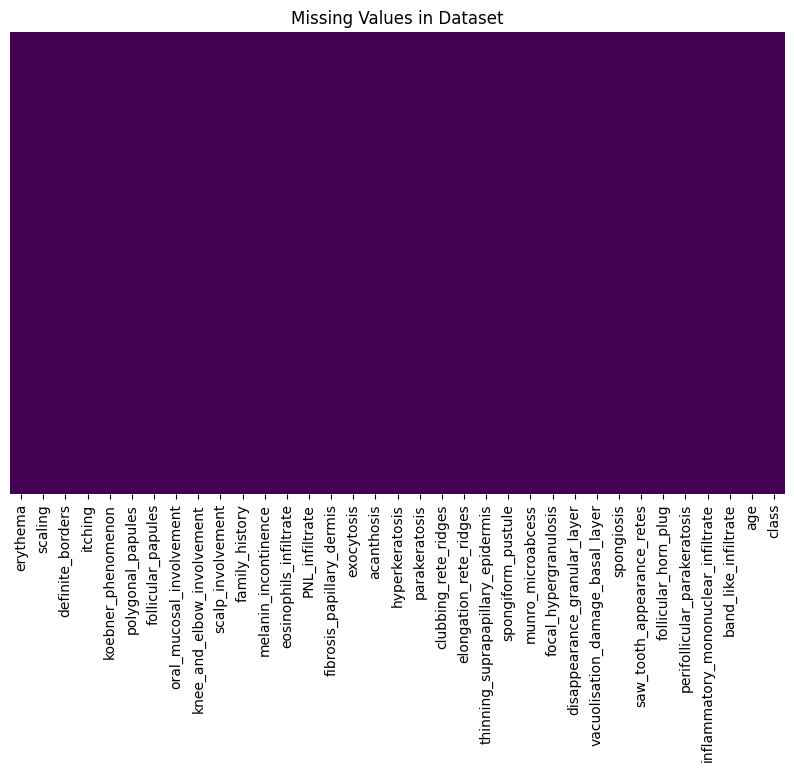

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values in Dataset")
plt.show()

In [9]:
print("\nData Types of Each Column:")
print(data.dtypes)


Data Types of Each Column:
erythema                                int64
scaling                                 int64
definite_borders                        int64
itching                                 int64
koebner_phenomenon                      int64
polygonal_papules                       int64
follicular_papules                      int64
oral_mucosal_involvement                int64
knee_and_elbow_involvement              int64
scalp_involvement                       int64
family_history                          int64
melanin_incontinence                    int64
eosinophils_infiltrate                  int64
PNL_infiltrate                          int64
fibrosis_papillary_dermis               int64
exocytosis                              int64
acanthosis                              int64
hyperkeratosis                          int64
parakeratosis                           int64
clubbing_rete_ridges                    int64
elongation_rete_ridges                  int64
thinni

In [10]:
# Identify categorical, numerical, and boolean columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
boolean_cols = data.select_dtypes(include=['bool']).columns

print("\nCategorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))
print("Boolean Columns:", list(boolean_cols))


Categorical Columns: ['age']
Numerical Columns: ['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement', 'family_history', 'melanin_incontinence', 'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing_rete_ridges', 'elongation_rete_ridges', 'thinning_suprapapillary_epidermis', 'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis', 'disappearance_granular_layer', 'vacuolisation_damage_basal_layer', 'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug', 'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate', 'band_like_infiltrate', 'class']
Boolean Columns: []


In [11]:
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(data[col].unique())


Unique values in 'age':
['55' '8' '26' '40' '45' '41' '18' '57' '22' '30' '20' '21' '10' '65' '38'
 '23' '17' '51' '42' '44' '33' '43' '50' '34' '?' '15' '46' '62' '35' '48'
 '12' '52' '60' '32' '19' '29' '25' '36' '13' '27' '31' '28' '64' '39'
 '47' '16' '0' '7' '70' '37' '61' '67' '56' '53' '24' '58' '49' '63' '68'
 '9' '75']


In [12]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')

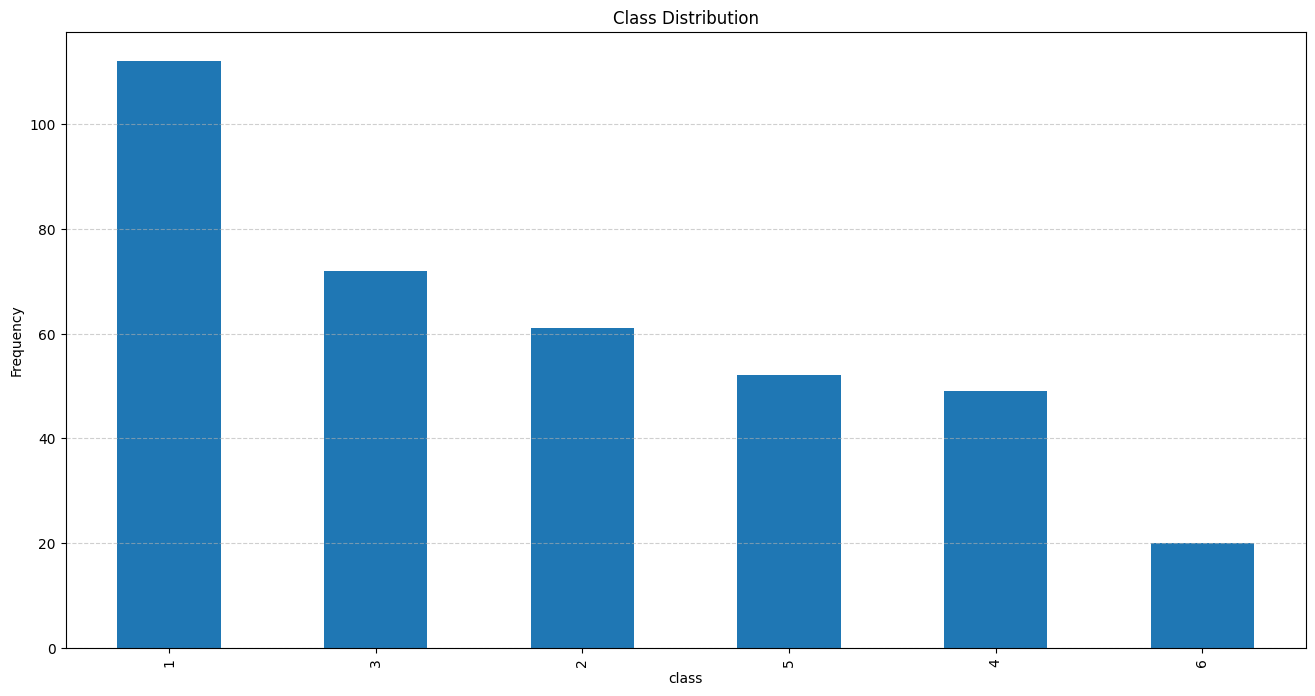

In [13]:
plt.figure(figsize=(16, 8))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['class'].value_counts().plot(kind='bar')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns only
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Apply Min-Max scaling
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("Data after Min-Max Scaling:\n", data.head())

Data after Min-Max Scaling:
    erythema   scaling  definite_borders   itching  koebner_phenomenon  \
0  0.666667  0.666667          0.000000  1.000000            0.000000   
1  1.000000  1.000000          1.000000  0.666667            0.333333   
2  0.666667  0.333333          0.666667  1.000000            0.333333   
3  0.666667  0.666667          0.666667  0.000000            0.000000   
4  0.666667  1.000000          0.666667  0.666667            0.666667   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0           0.000000                 0.0                  0.000000   
1           0.000000                 0.0                  0.000000   
2           1.000000                 0.0                  1.000000   
3           0.000000                 0.0                  0.000000   
4           0.666667                 0.0                  0.666667   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                    0.333333           0.000000  ... 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target labels (y)
y = data['class']  # Replace 'class' with the actual column name of your target variable
X = data.drop(columns=['class'])  # Ensure this matches your dataset
# Convert y into discrete class labels
# Convert continuous y values into categorical bins

y = np.digitize(y, bins=[0, 0.3, 0.7, 1.0], right=True) - 1  # Example binning



# Разделение данных на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Дерево решений
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)
dt_preds = dt_clf.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_preds):.4f}")

# Случайный лес
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_preds):.4f}")

Decision Tree Accuracy: 0.9459
Random Forest Accuracy: 1.0000


In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_:.4f}")

Best parameters: {'max_depth': 20, 'n_estimators': 100}
Best accuracy: 0.9726


In [17]:
from sklearn.metrics import classification_report

y_pred = grid_search.best_estimator_.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        31
           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         3

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



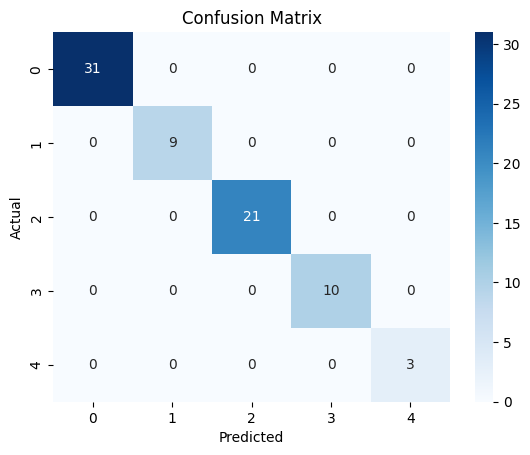

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [19]:
contagem_classe = data1['class'].value_counts().reset_index(name='Count')
contagem_classe.columns = ['class','Count']
contagem_classe

,class,Count
0,1,112
1,3,72
2,2,61
3,5,52
4,4,49
5,6,20


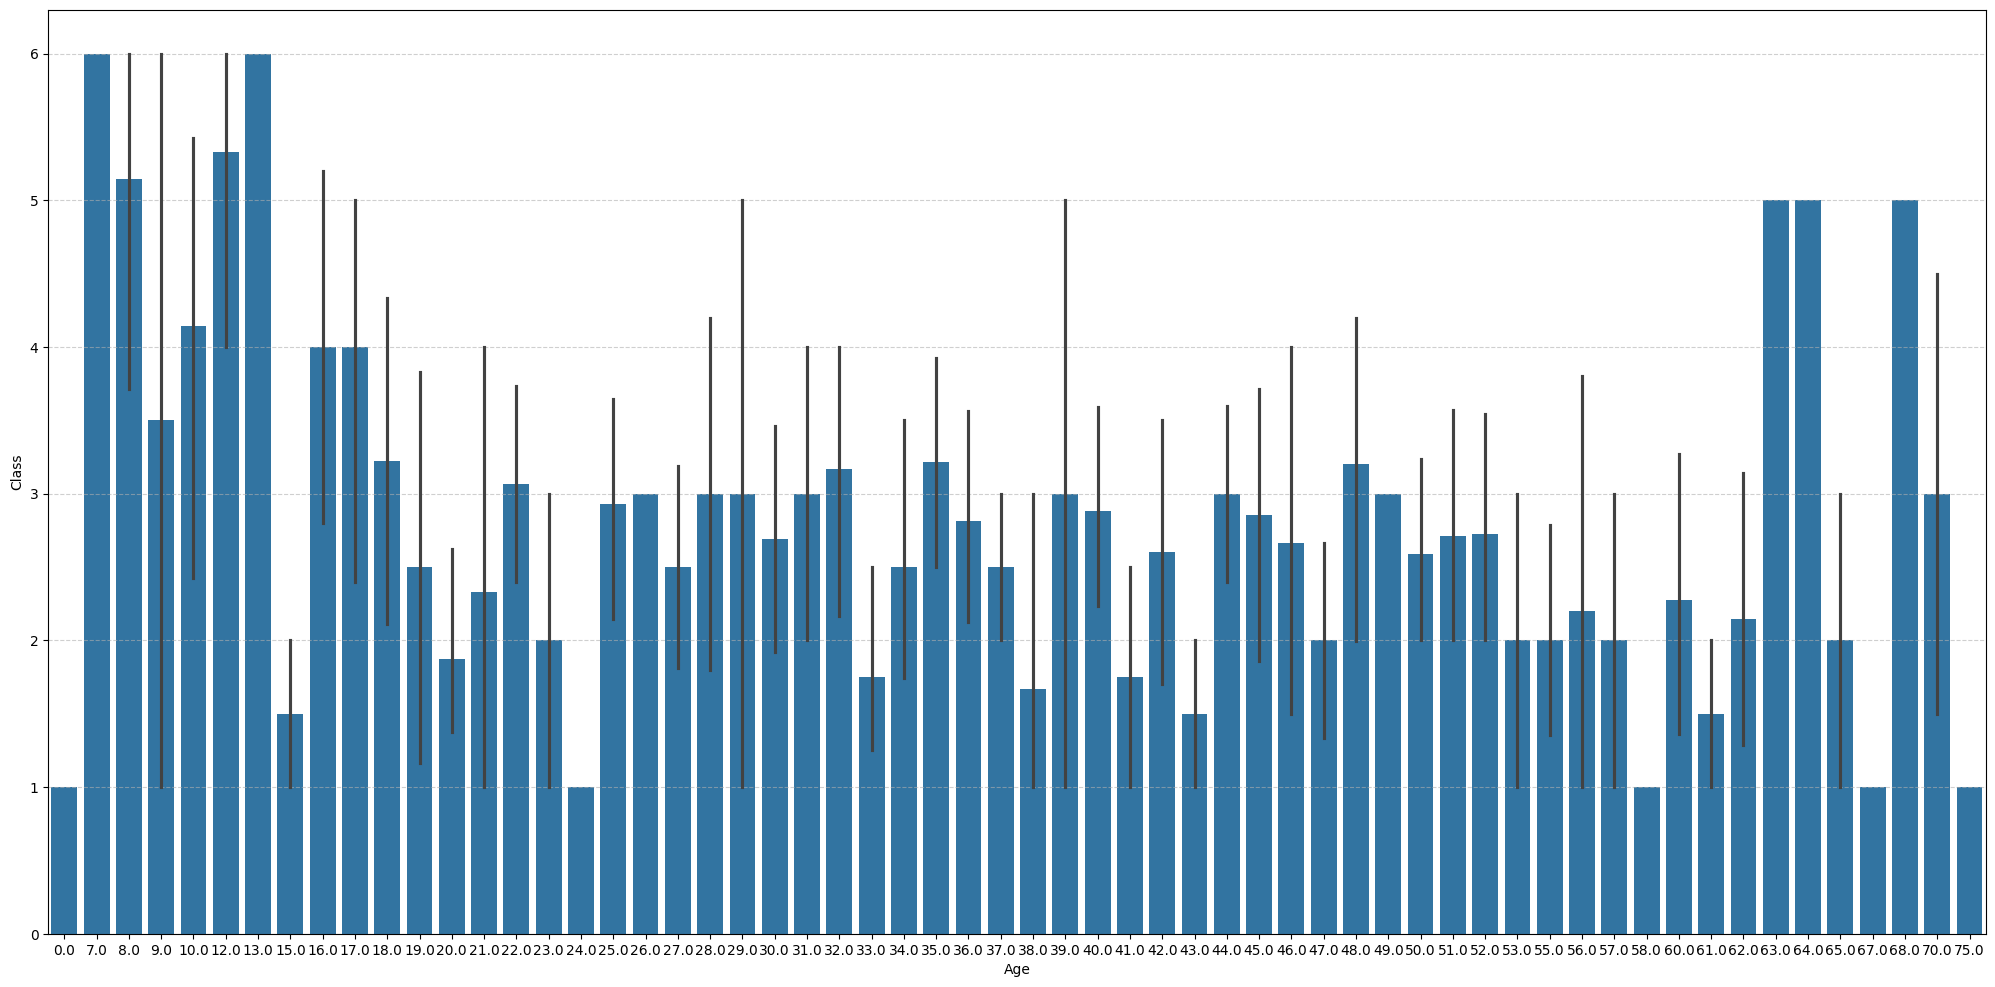

In [20]:
data1['age'] = pd.to_numeric(data1['age'], errors='coerce')
data1 = data1.dropna(subset=['age'])
data1_ordenado = data1.sort_values(by='age')

plt.figure(figsize=(25, 12))
sns.barplot(data=data1_ordenado, x='age', y='class')
plt.xlabel('Age')
plt.ylabel('Class')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [21]:
X = data1.drop('class',axis=1)
y = data1['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
#Chamada do modelo

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Avaliando
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

MSE: 0.4519059939092453
R²: 0.8091035957932262


In [23]:

print(np.unique(y_train)) 

[1 2 3 4 5 6]


In [24]:
print(np.unique(y_train))  # Should show at least two classes
print(np.unique(y_test))   # Should also show at least two classes

[1 2 3 4 5 6]
[1 2 3 4 5 6]


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Classes in y_train:", np.unique(y_train))
print("Classes in y_test:", np.unique(y_test))

Classes in y_train: [1 2 3 4 5 6]
Classes in y_test: [1 2 3 4 5 6]


In [26]:

overlap = np.intersect1d(X_train, X_test)
print("Overlap between X_train and X_test:", overlap.shape[0])

Overlap between X_train and X_test: 39


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

In [28]:
X = X.drop_duplicates()
y = y[X.index]

In [29]:
overlap_indices = np.intersect1d(X_train.index, X_test.index)
print("Overlap indices:", overlap_indices)  # Should be empty
print("Number of overlapping samples:", overlap_indices.shape[0])

Overlap indices: []
Number of overlapping samples: 0


In [30]:
# Check for duplicate rows in X
duplicate_rows = X.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


In [31]:
# Convert X_train and X_test to DataFrames and reset indices for comparison
X_train_reset = pd.DataFrame(X_train)
X_test_reset = pd.DataFrame(X_test)

# Find the identical rows using merge
overlap_rows = pd.merge(X_train_reset, X_test_reset, how='inner')

# Display the number of identical rows
print(f"Number of identical rows: {overlap_rows.shape[0]}")

Number of identical rows: 0


In [32]:
# Print sample data from both X_train and X_test
print("Sample from X_train:")
print(X_train.head())

print("Sample from X_test:")
print(X_test.head())

Sample from X_train:
     erythema  scaling  definite_borders  itching  koebner_phenomenon  \
81          3        2                 2        2                   0   
101         1        1                 2        0                   0   
174         3        2                 2        2                   0   
27          1        2                 2        3                   0   
229         2        2                 0        2                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
81                   0                   0                         0   
101                  0                   0                         0   
174                  2                   0                         2   
27                   0                   0                         0   
229                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
81                            0                 

In [33]:
# Check if there is any overlap in indices between X_train and X_test
overlap_indices = np.intersect1d(X_train.index, X_test.index)
print(f"Number of overlapping indices: {len(overlap_indices)}")

Number of overlapping indices: 0


In [34]:
from sklearn.model_selection import train_test_split

# Check how you split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the number of rows in each set
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (286, 34)
X_test shape: (72, 34)


In [35]:
overlap = np.intersect1d(X_train, X_test)
print("Overlap after split:", overlap.shape[0])

Overlap after split: 40


In [36]:
# Foi preciso escalonar os dados por conta do solver usado pela biblioteca, não conseguiamos terminar os cálculos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Example: Convert continuous values into 3 categories (low, medium, high)
y_train = np.digitize(y_train, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5])  # Adjust bins based on your data distribution
y_test = np.digitize(y_test, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5])


model = LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

MSE: 0.125
R²: 0.9471968709256845


In [37]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{1: 89, 2: 46, 3: 57, 4: 40, 5: 36, 6: 18}


In [38]:
from sklearn.metrics import classification_report

y_pred = grid_search.best_estimator_.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      22.0
           2       0.00      0.00      0.00      14.0
           3       0.00      0.00      0.00      14.0
           4       0.00      0.00      0.00       8.0
           5       0.00      0.00      0.00      12.0
           6       0.00      0.00      0.00       2.0

    accuracy                           0.00      72.0
   macro avg       0.00      0.00      0.00      72.0
weighted avg       0.00      0.00      0.00      72.0



c:\Users\shvve\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shvve\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shvve\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shv

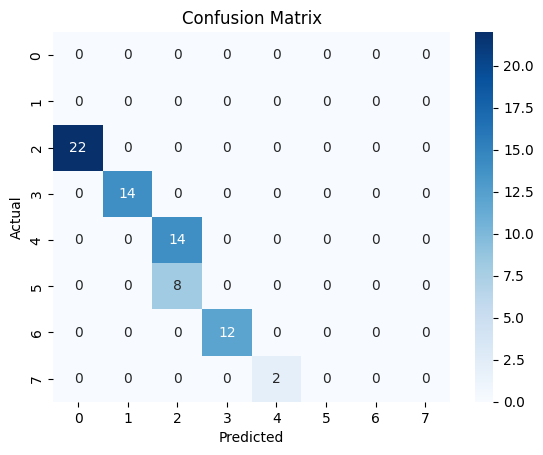

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()